# 03 머신러닝의 기초를 다집니다

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/do-it-dl/blob/master/Ch03.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/do-it-dl/blob/master/Ch03.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 03-1 선형 회귀에 대해 알아봅니다

In [1]:
# !pip install scikit-learn

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [4]:
import pandas as pd
pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
pd.DataFrame(diabetes.target).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [6]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [7]:
diabetes.target[:3]

array([151.,  75., 141.])

In [8]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [10]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

- 1.	age: 나이
- 2.	sex: 성별
- 3.	bmi: 체질량지수 (Body Mass Index)
- 4.	bp: 평균 혈압 (Average Blood Pressure)
- 5.	s1: TC, 총 혈청 콜레스테롤 (Total Cholesterol)
- 6.	s2: LDL, 저밀도 지단백 (Low-Density Lipoproteins)
- 7.	s3: HDL, 고밀도 지단백 (High-Density Lipoproteins)
- 8.	s4: TCH, 총 콜레스테롤 (Total Cholesterol / HDL)
- 9.	s5: LTG, 라코틴 (Lamotrigine)
- 10.	s6: GLU, 혈당 수치 (Blood Sugar Level)
- target: 환자의 1년 후 당뇨병 진행 상태를 나타내는 연속적인 값

당뇨병 데이터셋
----------------

442명의 당뇨병 환자에 대해 나이, 성별, 체질량지수, 평균 혈압, 그리고 여섯 가지 혈청 측정값 등 10개의 기본 변수가 수집되었으며, 기준 시점으로부터 1년 후의 질병 진행 정도를 정량적으로 측정한 값도 포함되어 있습니다.

**데이터셋 특성:**

- 인스턴스 수: 442
- 속성 수: 처음 10개 열은 숫자형 예측 값
- 타겟: 11번째 열은 기준 시점으로부터 1년 후의 질병 진행 정도를 정량적으로 측정한 값

**속성 정보:**
- 나이: 연령 (years)
- 성별: 성별
- 체질량지수 (bmi): 체질량지수
- 평균 혈압 (bp): 평균 혈압
- 총 혈청 콜레스테롤 (s1): 총 혈청 콜레스테롤
- 저밀도 지단백 (s2): 저밀도 지단백
- 고밀도 지단백 (s3): 고밀도 지단백
- 총 콜레스테롤 / HDL (s4): 총 콜레스테롤 / HDL 비율
- 혈청 트리글리세라이드 수치의 로그값일 가능성 있음 (s5): 혈청 트리글리세라이드 수치
- 혈당 수치 (s6): 혈당 수치

참고: 이 10개의 피처 변수는 모두 평균 중심화(mean-centered) 및 표준 편차에 샘플 수의 제곱근을 곱한 값으로 스케일 조정되었습니다(즉, 각 열의 제곱합은 1이 됨).

출처 URL:
[https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

더 자세한 정보는 다음을 참조하세요:
Bradley Efron, Trevor Hastie, Iain Johnstone 및 Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
[https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['axes.unicode_minus'] = False

In [13]:
# Matplotlib은 기본적으로  '-'(빼기, 음수 부호) 표시가 제대로 표기되지 않는다. 그와 동시에 아래와 같은 경고메시지를 출력한다.
# UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.func(*args, **kwargs)
# 해결법
plt.rcParams['axes.unicode_minus'] = False

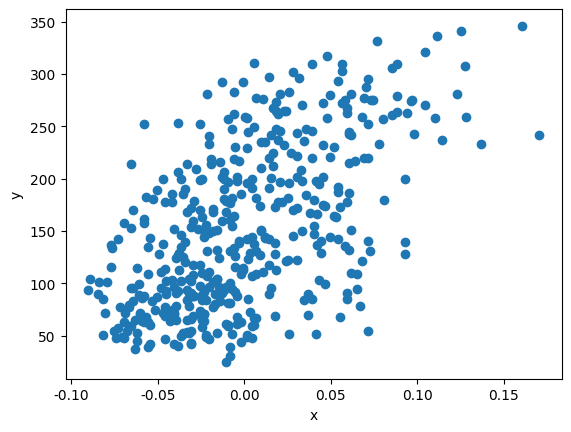

In [14]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
x = diabetes.data[:, 2]
y = diabetes.target

<퀴즈> 슬라이싱을 사용해 훈련 데이터 x에서 100번째 부터 109번째 까지 샘플을 출력해 보세요. 슬라이싱한 배열의 크기는 얼마인가요?

In [16]:
x_sample = x[100:110]
print(x_sample, x_sample.shape)

[ 0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964 -0.03207344
 -0.07626374  0.04984027  0.04552903 -0.00943939] (10,)


In [17]:
pd.DataFrame(diabetes.data)[2].iloc[100]

0.0175059114895705

## 03-2 경사 하강법에 대해 알아봅니다

In [18]:
w = 1.0
b = 1.0

In [19]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [20]:
print(y[0])

151.0


In [21]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705517


In [22]:
print(y_hat_inc - y_hat)
print(w_inc - w)

0.006169620651868435
0.10000000000000009


In [23]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [24]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [25]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [26]:
print(y_hat_inc - y_hat)
print(b_inc - b)

0.10000000000000009
0.10000000000000009


In [27]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [28]:
b_new = b + 1
print(b_new)

2.0


In [29]:
err = y[0] - y_hat
print(err)
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

149.9383037934813
10.250624555903848 150.9383037934813


In [30]:
print(w)
print(b)

1.0
1.0


In [31]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [32]:
y_hat = x[2] * w_new + b_new
err = y[2] - y_hat
w_rate = x[2]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

17.014719208776086 140.3718013346938


In [33]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


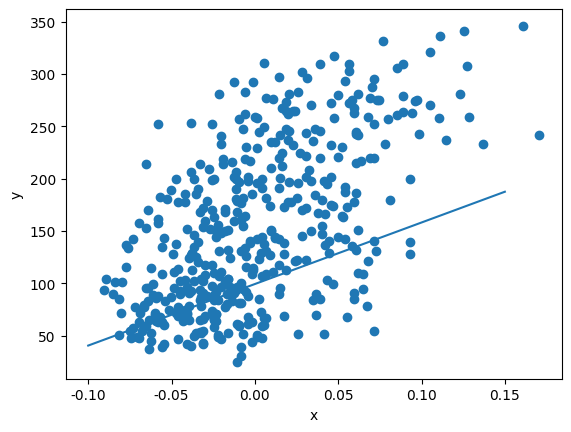

In [34]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [35]:
x = diabetes.data[:, 2]
y = diabetes.target

In [36]:
for i in range(1, 10):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5656499924592 123.39181064719266


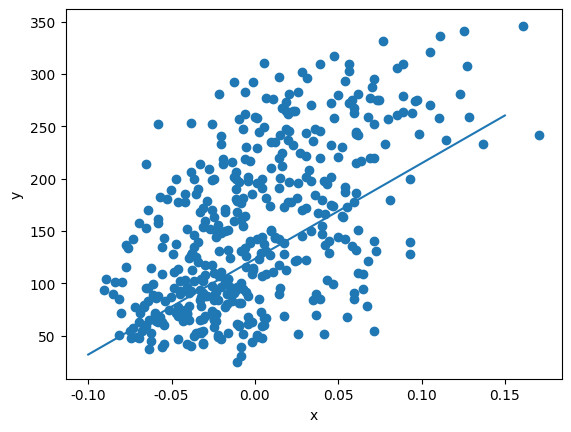

In [37]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
x = diabetes.data[:, 2]
y = diabetes.target

In [39]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


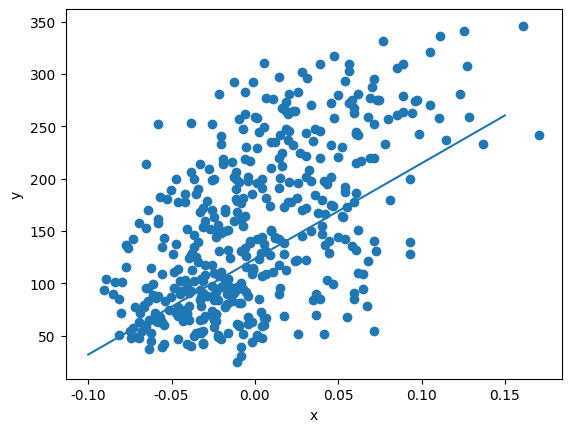

In [40]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
x = diabetes.data[:, 2]
y = diabetes.target

In [42]:
for i in range(1, 1000):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


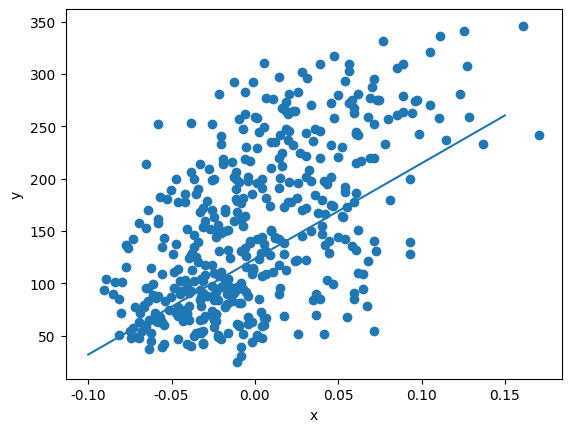

In [43]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


Text(0, 0.5, 'y')

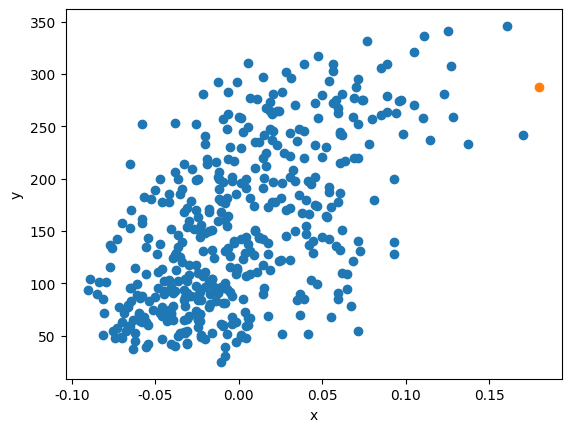

In [52]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
# plt.show()

## 03-4 뉴런을 만들어봅니다

In [46]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [62]:
neuron = Neuron()
neuron.fit(x, y)

In [63]:
print("w :", neuron.w)
print("b :", neuron.b)

w : 913.5973364346786
b : 123.39414383177173


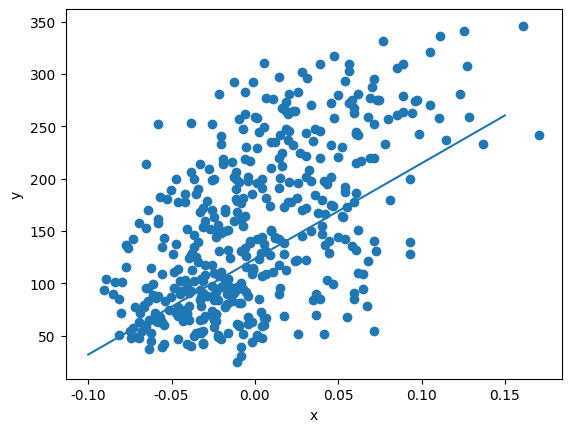

In [64]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()